# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [572]:
m = 1
A = 0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

Choose your grid

In [573]:
global loggrid=false
global bisection=false
global meshrefinement=false;

In [574]:
using Quadmath, Printf

res=m;
N=2.0^m*7500.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
Nt=2.0^m*7500.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [575]:
print(N)

7500.0

In [576]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [577]:
using Printf
include("./ScalarField.jl");
include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [578]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)


step size is  0.00013333333333333334
the time step is 6.666665e-5


# Initial data of m β Ψ and Ψ,x

In [579]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [580]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [581]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [582]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);
state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

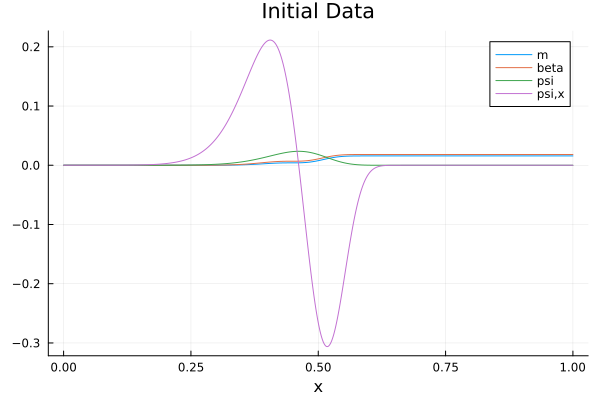

In [583]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

In [584]:
"""using TickTock
tick()
a=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5])#doublegrid(initX1)
tock()

tick()
f=Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
b=f(initX1)

#println(a.-b)
tock()

#plot(initX1, a.-init_gaussian_der(initX1,r0,sigma,A))
plot(doublegrid(initX1), a.-init_gaussian_der(doublegrid(initX1),r0,sigma,A))""";


# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [585]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [586]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [587]:
ginit=speed(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.000533940152451


In [588]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [589]:
finaltime=1.3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 10 dt is 0.0001333688960012644, t=0.0013336889600126438 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 20 dt is 0.0001333688960012644, t=0.002667377920025288 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 30 dt is 0.0001333688960012644, t=0.004001066880037933 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 40 dt is 0.0001333688960012644, t=0.005334755840050579 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 50 dt is 0.0001333688960012644, t=0.006668444800063224 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 60 dt is 0.0001333688960012644, t=0.008002133760075868 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 70 dt is 0.0001333688960012644, t=0.009335822720088514 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 80 dt is 0.0001333688960012644, t=0.010669511680101159 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 90 dt is 0.



iteration 690 dt is 0.00013336889600126442, t=0.09202453824087248 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 700 dt is 0.0001333688960012644, t=0.09335822720088516 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 710 dt is 0.0001333688960012644, t=0.09469191616089784 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 720 dt is 0.00013336889600126442, t=0.09602560512091052 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 730 dt is 0.0001333688960012644, t=0.0973592940809232 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 740 dt is 0.0001333688960012644, t=0.09869298304093588 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 750 dt is 0.00013336889600126442, t=0.10002667200094856 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 760 dt is 0.0001333688960012644, t=0.10136036096096124 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 770 dt is 



iteration 1360 dt is 0.0001333688960012644, t=0.18138169856172204 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 1370 dt is 0.0001333688960012644, t=0.18271538752173472 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 1380 dt is 0.00013336889600126442, t=0.1840490764817474 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 1390 dt is 0.0001333688960012644, t=0.18538276544176008 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 1400 dt is 0.0001333688960012644, t=0.18671645440177276 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 1410 dt is 0.00013336889600126437, t=0.18805014336178544 speed is 0.4998666755555557, dx/dt=0.9997333511111115


iteration 1420 dt is 0.0001333688960012644, t=0.18938383232179812 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 1430 dt is 0.0001333688960012644, t=0.1907175212818108 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 1440 



iteration 2030 dt is 0.0001333688960012644, t=0.27073885888256727 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2040 dt is 0.0001333688960012644, t=0.27207254784257967 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2050 dt is 0.0001333688960012644, t=0.2734062368025921 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2060 dt is 0.0001333688960012644, t=0.2747399257626045 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2070 dt is 0.00013336889600126442, t=0.2760736147226169 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 2080 dt is 0.0001333688960012644, t=0.2774073036826293 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2090 dt is 0.0001333688960012644, t=0.2787409926426417 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2100 dt is 0.0001333688960012644, t=0.2800746816026541 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2110 dt i



iteration 2700 dt is 0.00013336889600126437, t=0.36009601920339823 speed is 0.4998666755555557, dx/dt=0.9997333511111115


iteration 2710 dt is 0.0001333688960012644, t=0.36142970816341063 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2720 dt is 0.0001333688960012644, t=0.36276339712342304 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2730 dt is 0.0001333688960012644, t=0.36409708608343544 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2740 dt is 0.00013336889600126442, t=0.36543077504344784 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 2750 dt is 0.0001333688960012644, t=0.36676446400346024 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 2760 dt is 0.00013336889600126442, t=0.36809815296347265 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 2770 dt is 0.0001333688960012644, t=0.36943184192348505 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 27



iteration 3370 dt is 0.0001333688960012644, t=0.4494531795242292 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 3380 dt is 0.0001333688960012644, t=0.4507868684842416 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 3390 dt is 0.00013336889600126442, t=0.452120557444254 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 3400 dt is 0.0001333688960012644, t=0.4534542464042664 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 3410 dt is 0.0001333688960012644, t=0.4547879353642788 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 3420 dt is 0.0001333688960012644, t=0.4561216243242912 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 3430 dt is 0.00013336889600126437, t=0.4574553132843036 speed is 0.4998666755555557, dx/dt=0.9997333511111115


iteration 3440 dt is 0.00013336889600126442, t=0.458789002244316 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 3450 dt is 0



iteration 4040 dt is 0.00013336889600126445, t=0.5388103398450602 speed is 0.4998666755555554, dx/dt=0.9997333511111108


iteration 4050 dt is 0.00013336889600126445, t=0.5401440288050726 speed is 0.4998666755555554, dx/dt=0.9997333511111108


iteration 4060 dt is 0.00013336889600126448, t=0.541477717765085 speed is 0.4998666755555553, dx/dt=0.9997333511111106


iteration 4070 dt is 0.00013336889600126445, t=0.5428114067250974 speed is 0.4998666755555554, dx/dt=0.9997333511111108


iteration 4080 dt is 0.00013336889600126448, t=0.5441450956851098 speed is 0.4998666755555553, dx/dt=0.9997333511111106


iteration 4090 dt is 0.0001333688960012645, t=0.5454787846451222 speed is 0.4998666755555552, dx/dt=0.9997333511111104


iteration 4100 dt is 0.0001333688960012645, t=0.5468124736051346 speed is 0.4998666755555552, dx/dt=0.9997333511111104


iteration 4110 dt is 0.0001333688960012645, t=0.548146162565147 speed is 0.4998666755555552, dx/dt=0.9997333511111104


iteration 4120 dt is 0.0001



iteration 4720 dt is 0.000133368896001267, t=0.6295011891259036 speed is 0.49986667555554587, dx/dt=0.9997333511110917


iteration 4730 dt is 0.00013336889600126708, t=0.630834878085916 speed is 0.49986667555554554, dx/dt=0.9997333511110912


iteration 4740 dt is 0.00013336889600126721, t=0.6321685670459284 speed is 0.49986667555554504, dx/dt=0.9997333511110901


iteration 4750 dt is 0.00013336889600126732, t=0.6335022560059408 speed is 0.49986667555554465, dx/dt=0.9997333511110893


iteration 4760 dt is 0.00013336889600126743, t=0.6348359449659532 speed is 0.49986667555554426, dx/dt=0.9997333511110885


iteration 4770 dt is 0.0001333688960012676, t=0.6361696339259656 speed is 0.49986667555554365, dx/dt=0.9997333511110873


iteration 4780 dt is 0.00013336889600126773, t=0.637503322885978 speed is 0.4998666755555431, dx/dt=0.9997333511110863


iteration 4790 dt is 0.00013336889600126784, t=0.6388370118459904 speed is 0.4998666755555427, dx/dt=0.9997333511110854


iteration 4800 dt is 



iteration 5400 dt is 0.0001333688960012787, t=0.720192038406747 speed is 0.49986667555550196, dx/dt=0.999733351111004


iteration 5410 dt is 0.0001333688960012787, t=0.7215257273667594 speed is 0.49986667555550196, dx/dt=0.999733351111004


iteration 5420 dt is 0.00013336889600127868, t=0.7228594163267718 speed is 0.4998666755555021, dx/dt=0.9997333511110041


iteration 5430 dt is 0.00013336889600127857, t=0.7241931052867842 speed is 0.49986667555550246, dx/dt=0.999733351111005


iteration 5440 dt is 0.0001333688960012785, t=0.7255267942467966 speed is 0.49986667555550285, dx/dt=0.9997333511110056


iteration 5450 dt is 0.00013336889600127835, t=0.726860483206809 speed is 0.49986667555550335, dx/dt=0.9997333511110066


iteration 5460 dt is 0.00013336889600127822, t=0.7281941721668214 speed is 0.4998666755555038, dx/dt=0.9997333511110076


iteration 5470 dt is 0.00013336889600127806, t=0.7295278611268338 speed is 0.4998666755555044, dx/dt=0.9997333511110088


iteration 5480 dt is 0.00



iteration 6080 dt is 0.00012297033486086822, t=0.8097984580521151 speed is 0.5421361724524458, dx/dt=1.0842723449048917


iteration 6090 dt is 0.00012252219506431585, t=0.8110256905809607 speed is 0.5441191012915757, dx/dt=1.0882382025831514


iteration 6100 dt is 0.0001220814064891227, t=0.8122484821102501 speed is 0.5460837041765781, dx/dt=1.0921674083531563


iteration 6110 dt is 0.0001216479538571516, t=0.8134669060964452 speed is 0.5480294945606057, dx/dt=1.0960589891212114


iteration 6120 dt is 0.00012122183276840997, t=0.8146810359210193 speed is 0.5499559373436548, dx/dt=1.0999118746873096


iteration 6130 dt is 0.00012080303253616517, t=0.8158909448377419 speed is 0.551862525857606, dx/dt=1.103725051715212


iteration 6140 dt is 0.00012039153531792114, t=0.8170967059387926 speed is 0.5537487871603117, dx/dt=1.1074975743206235


iteration 6150 dt is 0.00011998731955008938, t=0.818298392128174 speed is 0.5556142675462993, dx/dt=1.1112285350925986


iteration 6160 dt is 0.0001



iteration 6760 dt is 0.00010591463381032833, t=0.8863735413649332 speed is 0.6294377298802087, dx/dt=1.2588754597604175


iteration 6770 dt is 0.00010575429528327798, t=0.8874318084221261 speed is 0.6303920468486929, dx/dt=1.2607840936973858


iteration 6780 dt is 0.00010559063255358919, t=0.8884884541243822 speed is 0.6313691380987997, dx/dt=1.2627382761975994


iteration 6790 dt is 0.0001054232578027838, t=0.8895434430906405 speed is 0.6323715284096094, dx/dt=1.2647430568192188


iteration 6800 dt is 0.00010525177237614926, t=0.8905967360362819 speed is 0.6334018436137402, dx/dt=1.2668036872274804


iteration 6810 dt is 0.00010507579162840686, t=0.8916482897515596 speed is 0.6344626638876882, dx/dt=1.2689253277753765


iteration 6820 dt is 0.00010489491989206361, t=0.8926980570714872 speed is 0.6355566764841077, dx/dt=1.2711133529682155


iteration 6830 dt is 0.00010470873766194264, t=0.8937459867966755 speed is 0.6366867575264188, dx/dt=1.2733735150528376


iteration 6840 dt is 0.



iteration 7450 dt is 7.278630780585077e-5, t=0.9509779183245738 speed is 0.9159231822074619, dx/dt=1.831846364414924


iteration 7460 dt is 7.199143109914133e-5, t=0.9517014098740603 speed is 0.9260361358125834, dx/dt=1.8520722716251665


iteration 7470 dt is 7.119654756658756e-5, t=0.9524169520613439 speed is 0.93637499212045, dx/dt=1.8727499842409001


iteration 7480 dt is 7.04022881059781e-5, t=0.9531245483101392 speed is 0.9469389200293019, dx/dt=1.8938778400586038


iteration 7490 dt is 6.960932214978794e-5, t=0.9538242085523487 speed is 0.9577261293136979, dx/dt=1.915452258627396


iteration 7500 dt is 6.881828493449079e-5, t=0.9545159491920606 speed is 0.9687347880018765, dx/dt=1.9374695760037532


iteration 7510 dt is 6.802983211903005e-5, t=0.9551997931523931 speed is 0.9799622399482292, dx/dt=1.9599244798964583


iteration 7520 dt is 6.724461671078453e-5, t=0.9558757698631223 speed is 0.9914052592997357, dx/dt=1.9828105185994713


iteration 7530 dt is 6.646328885782831e-5, 



iteration 8140 dt is 4.8844189887871434e-5, t=0.9877520714820907 speed is 1.3648842742547105, dx/dt=2.729768548509421


iteration 8150 dt is 4.9270933265553475e-5, t=0.9882428432553328 speed is 1.3530627947994438, dx/dt=2.7061255895988876


iteration 8160 dt is 4.97181179796399e-5, t=0.9887379956007741 speed is 1.3408928047913515, dx/dt=2.681785609582703


iteration 8170 dt is 5.018486260989101e-5, t=0.9892377281337498 speed is 1.3284218228292457, dx/dt=2.6568436456584914


iteration 8180 dt is 5.0670212846725496e-5, t=0.9897422312442774 speed is 1.3156973875031774, dx/dt=2.631394775006355


iteration 8190 dt is 5.117311487842645e-5, t=0.9902516852725038 speed is 1.302767416543799, dx/dt=2.605534833087598


iteration 8200 dt is 5.16924406681705e-5, t=0.990766259628263 speed is 1.2896792220475772, dx/dt=2.5793584440951545


iteration 8210 dt is 5.222694240227782e-5, t=0.9912861117911076 speed is 1.2764803681817505, dx/dt=2.552960736363501


iteration 8220 dt is 5.277527616570219e-5, t



iteration 8830 dt is 3.237582315059433e-5, t=1.0221948029865768 speed is 2.0591497042892284, dx/dt=4.118299408578457


iteration 8840 dt is 3.5093968107454226e-5, t=1.0225329719960856 speed is 1.899661687231834, dx/dt=3.7993233744636683


iteration 8850 dt is 3.844647563381354e-5, t=1.0229018590986847 speed is 1.734012430726773, dx/dt=3.468024861453546


iteration 8860 dt is 4.2280052643022044e-5, t=1.023307134906939 speed is 1.5767876929942617, dx/dt=3.153575385988524


iteration 8870 dt is 4.618980273350018e-5, t=1.023751618084445 speed is 1.4433200126727361, dx/dt=2.8866400253454723


iteration 8880 dt is 4.951556002740371e-5, t=1.0242326009700151 speed is 1.3463781209335188, dx/dt=2.6927562418670377


iteration 8890 dt is 5.1528120384000476e-5, t=1.0247401775185079 speed is 1.2937919367104787, dx/dt=2.5875838734209573


iteration 8900 dt is 5.166988374414957e-5, t=1.0252579430596995 speed is 1.2902422424013125, dx/dt=2.580484484802625


iteration 8910 dt is 4.967125546240589e-5, 



iteration 9510 dt is 0.00013336889600126442, t=1.0984626129038604 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 9520 dt is 0.0001333688960012644, t=1.0997963018638728 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 9530 dt is 0.0001333688960012644, t=1.1011299908238852 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 9540 dt is 0.0001333688960012644, t=1.1024636797838976 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 9550 dt is 0.00013336889600126442, t=1.10379736874391 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 9560 dt is 0.0001333688960012644, t=1.1051310577039224 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 9570 dt is 0.0001333688960012644, t=1.1064647466639348 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 9580 dt is 0.00013336889600126437, t=1.1077984356239472 speed is 0.4998666755555557, dx/dt=0.9997333511111115


iteration 9590 dt is 0



iteration 10190 dt is 0.0001333688960012644, t=1.1891534621847037 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10200 dt is 0.0001333688960012644, t=1.1904871511447161 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10210 dt is 0.00013336889600126442, t=1.1918208401047286 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 10220 dt is 0.0001333688960012644, t=1.193154529064741 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10230 dt is 0.0001333688960012644, t=1.1944882180247534 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10240 dt is 0.0001333688960012644, t=1.1958219069847658 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10250 dt is 0.0001333688960012644, t=1.1971555959447782 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10260 dt is 0.0001333688960012644, t=1.1984892849047906 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 1027



iteration 10860 dt is 0.0001333688960012644, t=1.2785106225055347 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10870 dt is 0.0001333688960012644, t=1.2798443114655471 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10880 dt is 0.00013336889600126442, t=1.2811780004255595 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 10890 dt is 0.0001333688960012644, t=1.282511689385572 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10900 dt is 0.0001333688960012644, t=1.2838453783455843 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10910 dt is 0.0001333688960012644, t=1.2851790673055967 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10920 dt is 0.0001333688960012644, t=1.2865127562656091 speed is 0.49986667555555564, dx/dt=0.9997333511111113


iteration 10930 dt is 0.00013336889600126442, t=1.2878464452256215 speed is 0.49986667555555553, dx/dt=0.9997333511111111


iteration 109

In [155]:
print(T_interp);

[0.0, 0.001002003004005006, 0.002004006008010012, 0.003006009012015018, 0.004008012016020024, 0.00501001502002503, 0.006012018024030036, 0.007014021028035042, 0.008016024032040048, 0.009018027036045054, 0.01002003004005006, 0.011022033044055066, 0.012024036048060072, 0.013026039052065078, 0.014028042056070084, 0.01503004506007509, 0.016032048064080096, 0.0170340510680851, 0.018036054072090107, 0.019038057076095113, 0.02004006008010012, 0.021042063084105125, 0.02204406608811013, 0.023046069092115137, 0.024048072096120143, 0.02505007510012515, 0.026052078104130155, 0.02705408110813516, 0.028056084112140167, 0.029058087116145173, 0.03006009012015018, 0.031062093124155185, 0.03206409612816019, 0.0330660991321652, 0.0340681021361702, 0.03507010514017521, 0.036072108144180215, 0.03707411114818522, 0.03807611415219023, 0.03907811715619523, 0.04008012016020024, 0.041082123164205245, 0.04208412616821025, 0.04308612917221526, 0.04408813217622026, 0.04509013518022527, 0.046092138184230275, 0.0470

, 0.49799549299048507, 0.49899749599449006, 0.49999949899849505, 0.5010015020025, 0.502003505006505, 0.50300550801051, 0.504007511014515, 0.50500951401852, 0.506011517022525, 0.50701352002653, 0.508015523030535, 0.50901752603454, 0.510019529038545, 0.51102153204255, 0.512023535046555, 0.51302553805056, 0.5140275410545649, 0.5150295440585699, 0.5160315470625749, 0.5170335500665799, 0.5180355530705849, 0.5190375560745899, 0.5200395590785949, 0.5210415620825999, 0.5220435650866049, 0.5230455680906099, 0.5240475710946149, 0.5250495740986199, 0.5260515771026248, 0.5270535801066298, 0.5280555831106348, 0.5290575861146398, 0.5300595891186448, 0.5310615921226498, 0.5320635951266548, 0.5330655981306598, 0.5340676011346648, 0.5350696041386698, 0.5360716071426748, 0.5370736101466798, 0.5380756131506849, 0.53907761615469, 0.5400796191586951, 0.5410816221627002, 0.5420836251667053, 0.5430856281707104, 0.5440876311747155, 0.5450896341787206, 0.5460916371827257, 0.5470936401867308, 0.5480956431907359

 1.0160310462386528, 1.0170330492426591, 1.0180350522466648, 1.0190370552506702, 1.0200390582546754, 1.0210410612586804, 1.0220430642626854, 1.0230450672666904, 1.0240470702706954, 1.0250490732747004, 1.0260510762787054, 1.0270530792827104, 1.0280550822867156, 1.0290570852907208, 1.0300590882947263, 1.0310610912987321, 1.032063094302739, 1.0330650973067466, 1.0340671003107555, 1.0350691033147663, 1.0360711063187795, 1.0370731093227956, 1.0380751123268153, 1.0390771153308394, 1.0400791183348688, 1.0410811213389042, 1.0420831243429467, 1.0430851273469974, 1.0440871303510575, 1.045089133355128, 1.04609113635921, 1.0470931393633047, 1.0480951423674136, 1.0490971453715379, 1.0500991483756785, 1.0511011513798372, 1.0521031543840147, 1.0531051573882126, 1.054107160392432, 1.0551091633966738, 1.0561111664009393, 1.0571131694052294, 1.0581151724095448, 1.0591171754138866, 1.0601191784182555, 1.061121181422652, 1.0621231844270766, 1.06312518743153, 1.0641271904360121, 1.0651291934405234, 1.06613

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04926157287086606.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04926157287086606.gif")
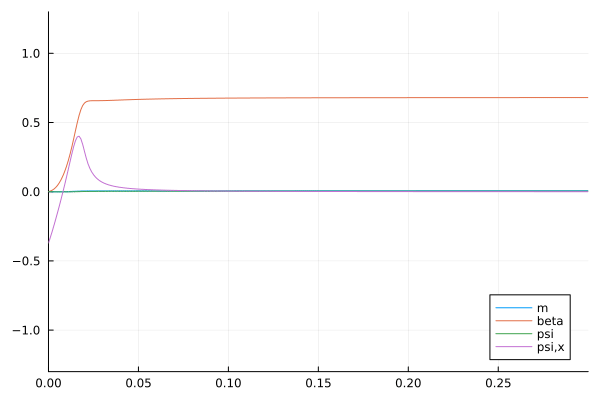

In [560]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1100:1:1160
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-1.3, 1.3],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04926157287086606.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04926157287086606.gif")
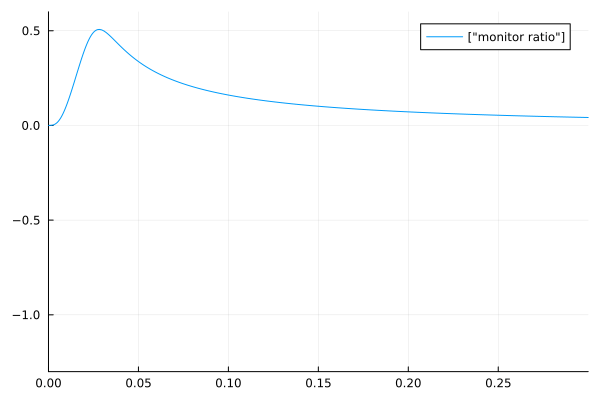

In [65]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

In [41]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif")
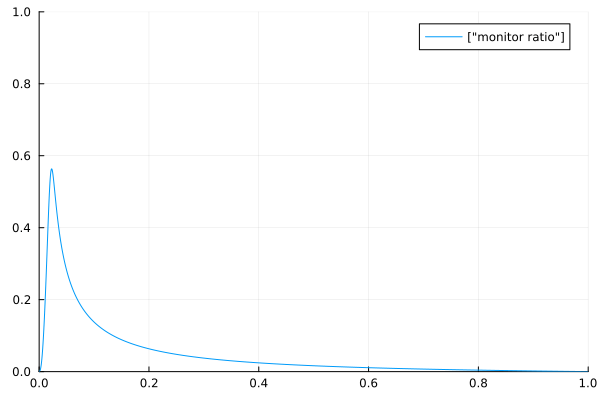

In [271]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

muninn animation

In [68]:
using Plots, CSV, DataFrames
import GR

lines = readlines(dir*"/res$res/data.txt")
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]

anim = @animate for n in 1:10
    
    for line in lines
        
    if occursin("Time", line)==true
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))

        end
    end



    #
    
    IJulia.clear_output(true)
    

    plot()
    
    
    plot!(grid[4:L-3], [m beta psi derpsi][4:L-3,:], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.001, 0.001],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1200)

LoadError: syntax: incomplete: "for" at In[68]:11 requires end

In [118]:
datagrid=Array{Float128}(undef, L)
datam=Array{Float128}(undef, L)
databeta=Array{Float128}(undef, L)
datapsi=Array{Float128}(undef, L)
dataderpsi=Array{Float128}(undef, L)

lines = readlines(dir*"/res$res/data.txt")

for line in lines
    if occursin("Time", line)==true
        plot(grid, m)
        
        
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
        
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))
        elseif a==[]
            #println(length(datagrid))
            #println(length(grid))
            #datagrid=cat(dims=2,datagrid, grid)
            datagrid=[datagrid; grid]
            datam=cat(dims=2,datam, m)
            databeta=cat(dims=2,databeta, beta)
            datapsi=cat(dims=2,datapsi, psi)
            dataderpsi=cat(dims=2,dataderpsi, derpsi)
        end
    end
    
end


In [119]:
datagrid

5796-element Vector{Any}:
    8.34319962899321883561303658422435691e-4956
    2.05206491026800433201677921073574507e-4936
 -nan
    8.34319963676342897893866671733368366e-4956
    1.53904868514964416335782103718351843e-4936
    2.77150719072578205953599890496588243e-4938
    1.19445898260724901253333516414690294e-4946
    1.53904868634410314596507031525083490e-4936
    2.77150776406609371101565222808974947e-4938
 -nan
    1.53904868753856212857231959331815136e-4936
    2.77150833740640536249530555121361651e-4938
    8.34319965554143682530893953901455664e-4956
    ⋮
    0.96
    0.965
    0.97
    0.975
    0.98
    0.985
    0.99
    0.995
    1.0
    1.005
    1.01
    1.015

In [117]:
A = Matrix{Int}(undef, 0, 2)  # 0x2 array of Int
B = rand(5, 2)
A = [A; B] 

5×2 Matrix{Float64}:
 0.12618    0.261235
 0.238235   0.840988
 0.200322   0.354143
 0.347195   0.854355
 0.0130686  0.727983

In [21]:
parse(Float64,"1")

1.0

In [47]:
dir*"/res$res/data.txt"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/data.txt"

In [ ]:
with open(dir) as f:
    for line in f:

        index = line.find("Time")
        if index==1:
            time.append(line[index+7:len(line)-1])
            auxgrid=[]
            auxm=[]
            auxbeta=[]
            auxpsi=[]
            auxderpsi=[]

        else:
                a=line.split()
                if a!=[]:
                    auxgrid.append(float(a[0]))
                    auxm.append(float(a[1]))
                    auxbeta.append(float(a[2]))
                    auxpsi.append(float(a[3]))
                    auxderpsi.append(float(a[4]))
                elif a==[]:
                    grid.append(auxgrid)
                    m.append(auxm)
                    beta.append(auxbeta)
                    psi.append(auxpsi)
                    derpsi.append(auxderpsi)
        datatime.append(time)
        datagrid.append(grid)
        datam.append(m)
        databeta.append(beta)
        datapsi.append(psi)
        dataderpsi.append(derpsi)

In [59]:
a=[ "ola tudo bem"]
split(a," ")

LoadError: MethodError: no method matching split(::Vector{String}, ::String)
[0mClosest candidates are:
[0m  split([91m::T[39m, ::Any; limit, keepempty) where T<:AbstractString at strings/util.jl:592

In [62]:
using DelimitedFiles

readdlm(dir*"/res$res/data.txt", ',',Int)

LoadError: unexpected character 'T' after quoted field at row 1 column 1

In [360]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [361]:
twod_epsilon(dt,dx)

3.12500000000000000000000000000000000e-02

In [363]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [147]:
twod_epsilon(dt,dx)

0.3125